In [190]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
# Load Service requests data file
df=pd.read_csv('311_Service_Requests_for_2009.csv')

C:\Users\Rohit\AppData\Local\conda\conda\envs\my_root\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8,13,14,17,18,20,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [192]:
# Shape of df
df.shape

(1783133, 52)

In [193]:
df.columns # Columns in dataset

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [194]:
df.head() # First 5 records of the dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,12822544,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11225,55 WINTHROP STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656621,-73.958066,"(40.65662129596871, -73.95806621423951)"
1,12818524,01/01/2009 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Restaurant/Bar/Deli/Bakery,11102,29-35 NEWTOWN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.768896,-73.921818,"(40.76889608950418, -73.92181786912313)"
2,12823061,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635345,-74.016822,"(40.635344653337626, -74.01682221017914)"
3,12823062,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698378,-73.983050,"(40.698378448801606, -73.98305008771115)"
4,12823063,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592752,-73.950152,"(40.59275234651692, -73.95015246435702)"


In [195]:
df.info() # Info about dataset columns such as data type of the individual columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783133 entries, 0 to 1783132
Data columns (total 52 columns):
Unique Key                        int64
Created Date                      object
Closed Date                       object
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Resolution Action Updated D

In [196]:
df.describe() # Statistical analysis about int and float type columns. No info for object dtype columns

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,1.783133e+06,1.651563e+06,1.651563e+06,1.651563e+06,1.651563e+06
mean,1.426476e+07,1.005578e+06,2.058625e+05,4.073167e+01,-7.392301e+01
std,8.691262e+05,2.269716e+04,3.184174e+04,8.739981e-02,8.185135e-02
min,1.281778e+07,9.133570e+05,1.210320e+05,4.049863e+01,-7.425494e+01
25%,1.342638e+07,9.939220e+05,1.821100e+05,4.066648e+01,-7.396514e+01
50%,1.430104e+07,1.004849e+06,2.027900e+05,4.072323e+01,-7.392567e+01
75%,1.502895e+07,1.017848e+06,2.365250e+05,4.081584e+01,-7.387874e+01
max,2.127794e+07,1.067279e+06,2.718760e+05,4.091287e+01,-7.370038e+01


In [197]:
# Get nan/null values in the entire dataset
df.isnull().sum()

Unique Key                              0
Created Date                            0
Closed Date                         59331
Agency                                  0
Agency Name                             0
Complaint Type                          0
Descriptor                           5540
Location Type                      574411
Incident Zip                       123025
Incident Address                   382336
Street Name                        382553
Cross Street 1                     385546
Cross Street 2                     394045
Intersection Street 1             1430866
Intersection Street 2             1430842
Address Type                        52218
City                               121815
Landmark                          1781072
Facility Type                     1555074
Status                                  0
Due Date                          1264395
Resolution Action Updated Date      14187
Community Board                         0
Borough                           

In [198]:
df.City.unique() # Unique cities

array(['BROOKLYN', 'ASTORIA', 'OZONE PARK', 'WOODSIDE', 'NEW YORK',
       'BRONX', 'STATEN ISLAND', 'ELMHURST', 'SUNNYSIDE', 'CORONA',
       'ARVERNE', 'MASPETH', 'WOODHAVEN', 'JAMAICA', 'HOLLIS',
       'QUEENS VILLAGE', 'FLUSHING', 'COLLEGE POINT', 'RIDGEWOOD',
       'ROCKAWAY PARK', 'LONG ISLAND CITY', nan, 'FOREST HILLS',
       'JACKSON HEIGHTS', 'RICHMOND HILL', 'SOUTH OZONE PARK',
       'MIDDLE VILLAGE', 'SOUTH RICHMOND HILL', 'REGO PARK', 'BAYSIDE',
       'HOWARD BEACH', 'KEW GARDENS', 'FAR ROCKAWAY', 'WHITESTONE',
       'SPRINGFIELD GARDENS', 'SAINT ALBANS', 'EAST ELMHURST', 'ROSEDALE',
       'CAMBRIA HEIGHTS', 'FRESH MEADOWS', 'GLEN OAKS', 'HOBOKEN',
       'LITTLE NECK', 'CEDAR KNOLLF', 'WOODMERE', 'OAKLAND GARDENS',
       'BELLEROSE', 'NORFOLK', 'FLORAL PARK', 'WHITE PLAINS', 'NY',
       'CLEVELAND', 'JACKSONVILLE', 'ATLANTA', 'NEW HYDE PARK',
       'LONG ISLAND', 'QUEENS', 'WING FARMINGDALE', 'ROCKVILLE',
       'MOUNT SINAI', 'WOODBURY', 'BREEZY POINT', 'EDGEWAT

In [199]:
df.City.unique().shape # No. of unique cities in dataset

(721,)

In [200]:
df.groupby(['City'])['City'].agg('count').sort_values(ascending=False) # No. of records per city in dataset

City
BROOKLYN                   524205
BRONX                      334612
NEW YORK                   332142
STATEN ISLAND               86465
JAMAICA                     46131
FLUSHING                    34307
ASTORIA                     24455
RIDGEWOOD                   18044
WOODSIDE                    13771
FAR ROCKAWAY                12645
QUEENS VILLAGE              12522
ELMHURST                    12254
CORONA                      11634
OZONE PARK                  10823
EAST ELMHURST               10806
FOREST HILLS                 9896
JACKSON HEIGHTS              9760
LONG ISLAND CITY             9315
SOUTH RICHMOND HILL          8726
SOUTH OZONE PARK             8642
FRESH MEADOWS                8623
SPRINGFIELD GARDENS          8409
MASPETH                      7509
SAINT ALBANS                 7503
RICHMOND HILL                7214
BAYSIDE                      6898
WOODHAVEN                    6822
HOLLIS                       6625
WHITESTONE                   6087
ROSEDALE 

In [201]:
df['City'].value_counts().nlargest(15) # Top 15 cities which has most no. of records..

BROOKLYN          524205
BRONX             334612
NEW YORK          332142
STATEN ISLAND      86465
JAMAICA            46131
FLUSHING           34307
ASTORIA            24455
RIDGEWOOD          18044
WOODSIDE           13771
FAR ROCKAWAY       12645
QUEENS VILLAGE     12522
ELMHURST           12254
CORONA             11634
OZONE PARK         10823
EAST ELMHURST      10806
Name: City, dtype: int64

In [202]:
df['Complaint Type'].value_counts() # Grouping Complaint types and count of records.

HEATING                                 238995
Street Light Condition                  130242
GENERAL CONSTRUCTION                    121048
PLUMBING                                104931
Street Condition                        102150
PAINT - PLASTER                          84324
NONCONST                                 67325
Water System                             62991
General Construction/Plumbing            61288
Traffic Signal Condition                 60995
Blocked Driveway                         52163
Sewer                                    49849
Dirty Conditions                         40732
ELECTRIC                                 38349
Building/Use                             35495
Noise                                    33707
Sanitation Condition                     32851
Noise - Street/Sidewalk                  27923
Noise - Commercial                       25234
Rodent                                   21622
Taxi Complaint                           20909
Noise - Vehic

In [203]:
df_complainttype_city = pd.DataFrame({'count': df.groupby(['Complaint Type', 'City']).size()}).reset_index() # New df for complaints type

In [204]:
df_complainttype_city.shape

(5519, 3)

In [205]:
df_complainttype_city.head(10)

,Complaint Type,City,count
0,APPLIANCE,ARVERNE,70
1,APPLIANCE,ASTORIA,82
2,APPLIANCE,BAYSIDE,4
3,APPLIANCE,BELLEROSE,4
4,APPLIANCE,BRONX,5042
5,APPLIANCE,BROOKLYN,5275
6,APPLIANCE,CAMBRIA HEIGHTS,7
7,APPLIANCE,COLLEGE POINT,19
8,APPLIANCE,CORONA,51
9,APPLIANCE,EAST ELMHURST,49


In [206]:
df_complainttype_city.sort_values(['count'],ascending=False) # Sorting 

,Complaint Type,City,count
2284,HEATING,BROOKLYN,79838
2283,HEATING,BRONX,76587
2306,HEATING,NEW YORK,48375
2147,GENERAL CONSTRUCTION,BROOKLYN,42562
2146,GENERAL CONSTRUCTION,BRONX,39158
3557,PLUMBING,BROOKLYN,36698
3556,PLUMBING,BRONX,33284
4424,Street Condition,BROOKLYN,29428
3511,PAINT - PLASTER,BRONX,28788
3512,PAINT - PLASTER,BROOKLYN,28464


In [207]:
df['Complaint Type'].isnull().sum() # Null record checks

0

In [208]:
major_complaints = df.groupby('Complaint Type') # Grouping on Complaint type column

In [209]:
type(major_complaints)

pandas.core.groupby.DataFrameGroupBy

In [210]:
major_complaints.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,12822544,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11225,55 WINTHROP STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656621,-73.958066,"(40.65662129596871, -73.95806621423951)"
1,12818524,01/01/2009 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Restaurant/Bar/Deli/Bakery,11102,29-35 NEWTOWN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.768896,-73.921818,"(40.76889608950418, -73.92181786912313)"
2,12823061,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635345,-74.016822,"(40.635344653337626, -74.01682221017914)"
3,12823062,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698378,-73.983050,"(40.698378448801606, -73.98305008771115)"
4,12823063,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592752,-73.950152,"(40.59275234651692, -73.95015246435702)"
5,12826508,01/01/2009 12:00:00 AM,01/12/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11417,103-60 104 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682935,-73.837448,"(40.68293534353076, -73.83744823185012)"
6,12826510,01/01/2009 12:00:00 AM,01/12/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,11225,1211 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.657639,-73.950295,"(40.65763925884526, -73.95029500016935)"
7,12826511,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11237,1409 HANCOCK STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695892,-73.907598,"(40.69589152610558, -73.9075975573773)"
8,12826512,01/01/2009 12:00:00 AM,01/10/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11377,31-38 68 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.757194,-73.899102,"(40.75719405987824, -73.8991022643995)"
9,12826513,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10028,227 EAST 82 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775927,-73.955110,"(40.77592667846, -73.9551098553282)"


In [211]:
sorted_major_complaints = major_complaints.size().sort_values(ascending=False) 

In [212]:
sorted_major_complaints.head(5)

Complaint Type
HEATING                   238995
Street Light Condition    130242
GENERAL CONSTRUCTION      121048
PLUMBING                  104931
Street Condition          102150
dtype: int64

In [213]:
sorted_major_complaints = sorted_major_complaints.to_frame('count').reset_index()

In [214]:
sorted_major_complaints.head(20)

,Complaint Type,count
0,HEATING,238995
1,Street Light Condition,130242
2,GENERAL CONSTRUCTION,121048
3,PLUMBING,104931
4,Street Condition,102150
5,PAINT - PLASTER,84324
6,NONCONST,67325
7,Water System,62991
8,General Construction/Plumbing,61288
9,Traffic Signal Condition,60995


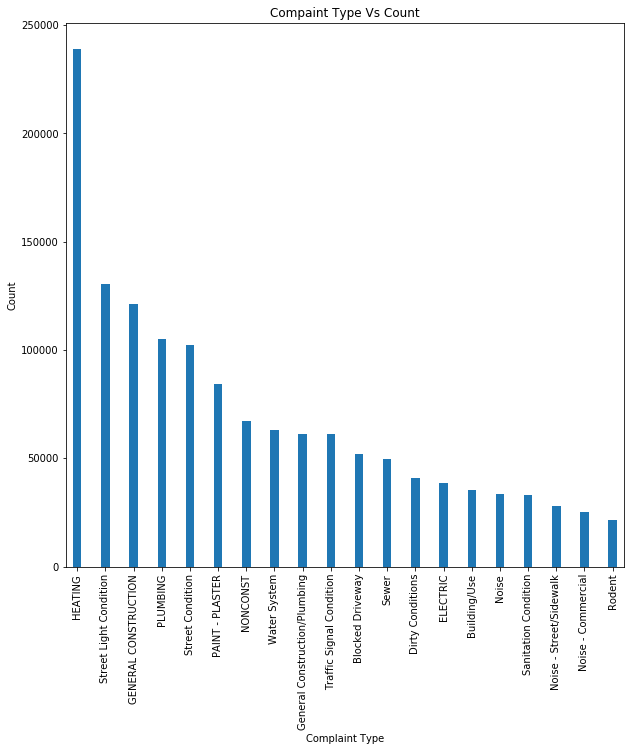

In [215]:
#Plotting Bar graph Between complaint type vs Count (Top 20 complaint type)

complaint_type = major_complaints.size().sort_values(ascending=False)
plt.figure(figsize=(10,10))
complaint_type.head(20).plot(kind='bar',width=0.3)
plt.title('Compaint Type Vs Count')
plt.xlabel('Complaint Type')
plt.ylabel('Count')

plt.show()

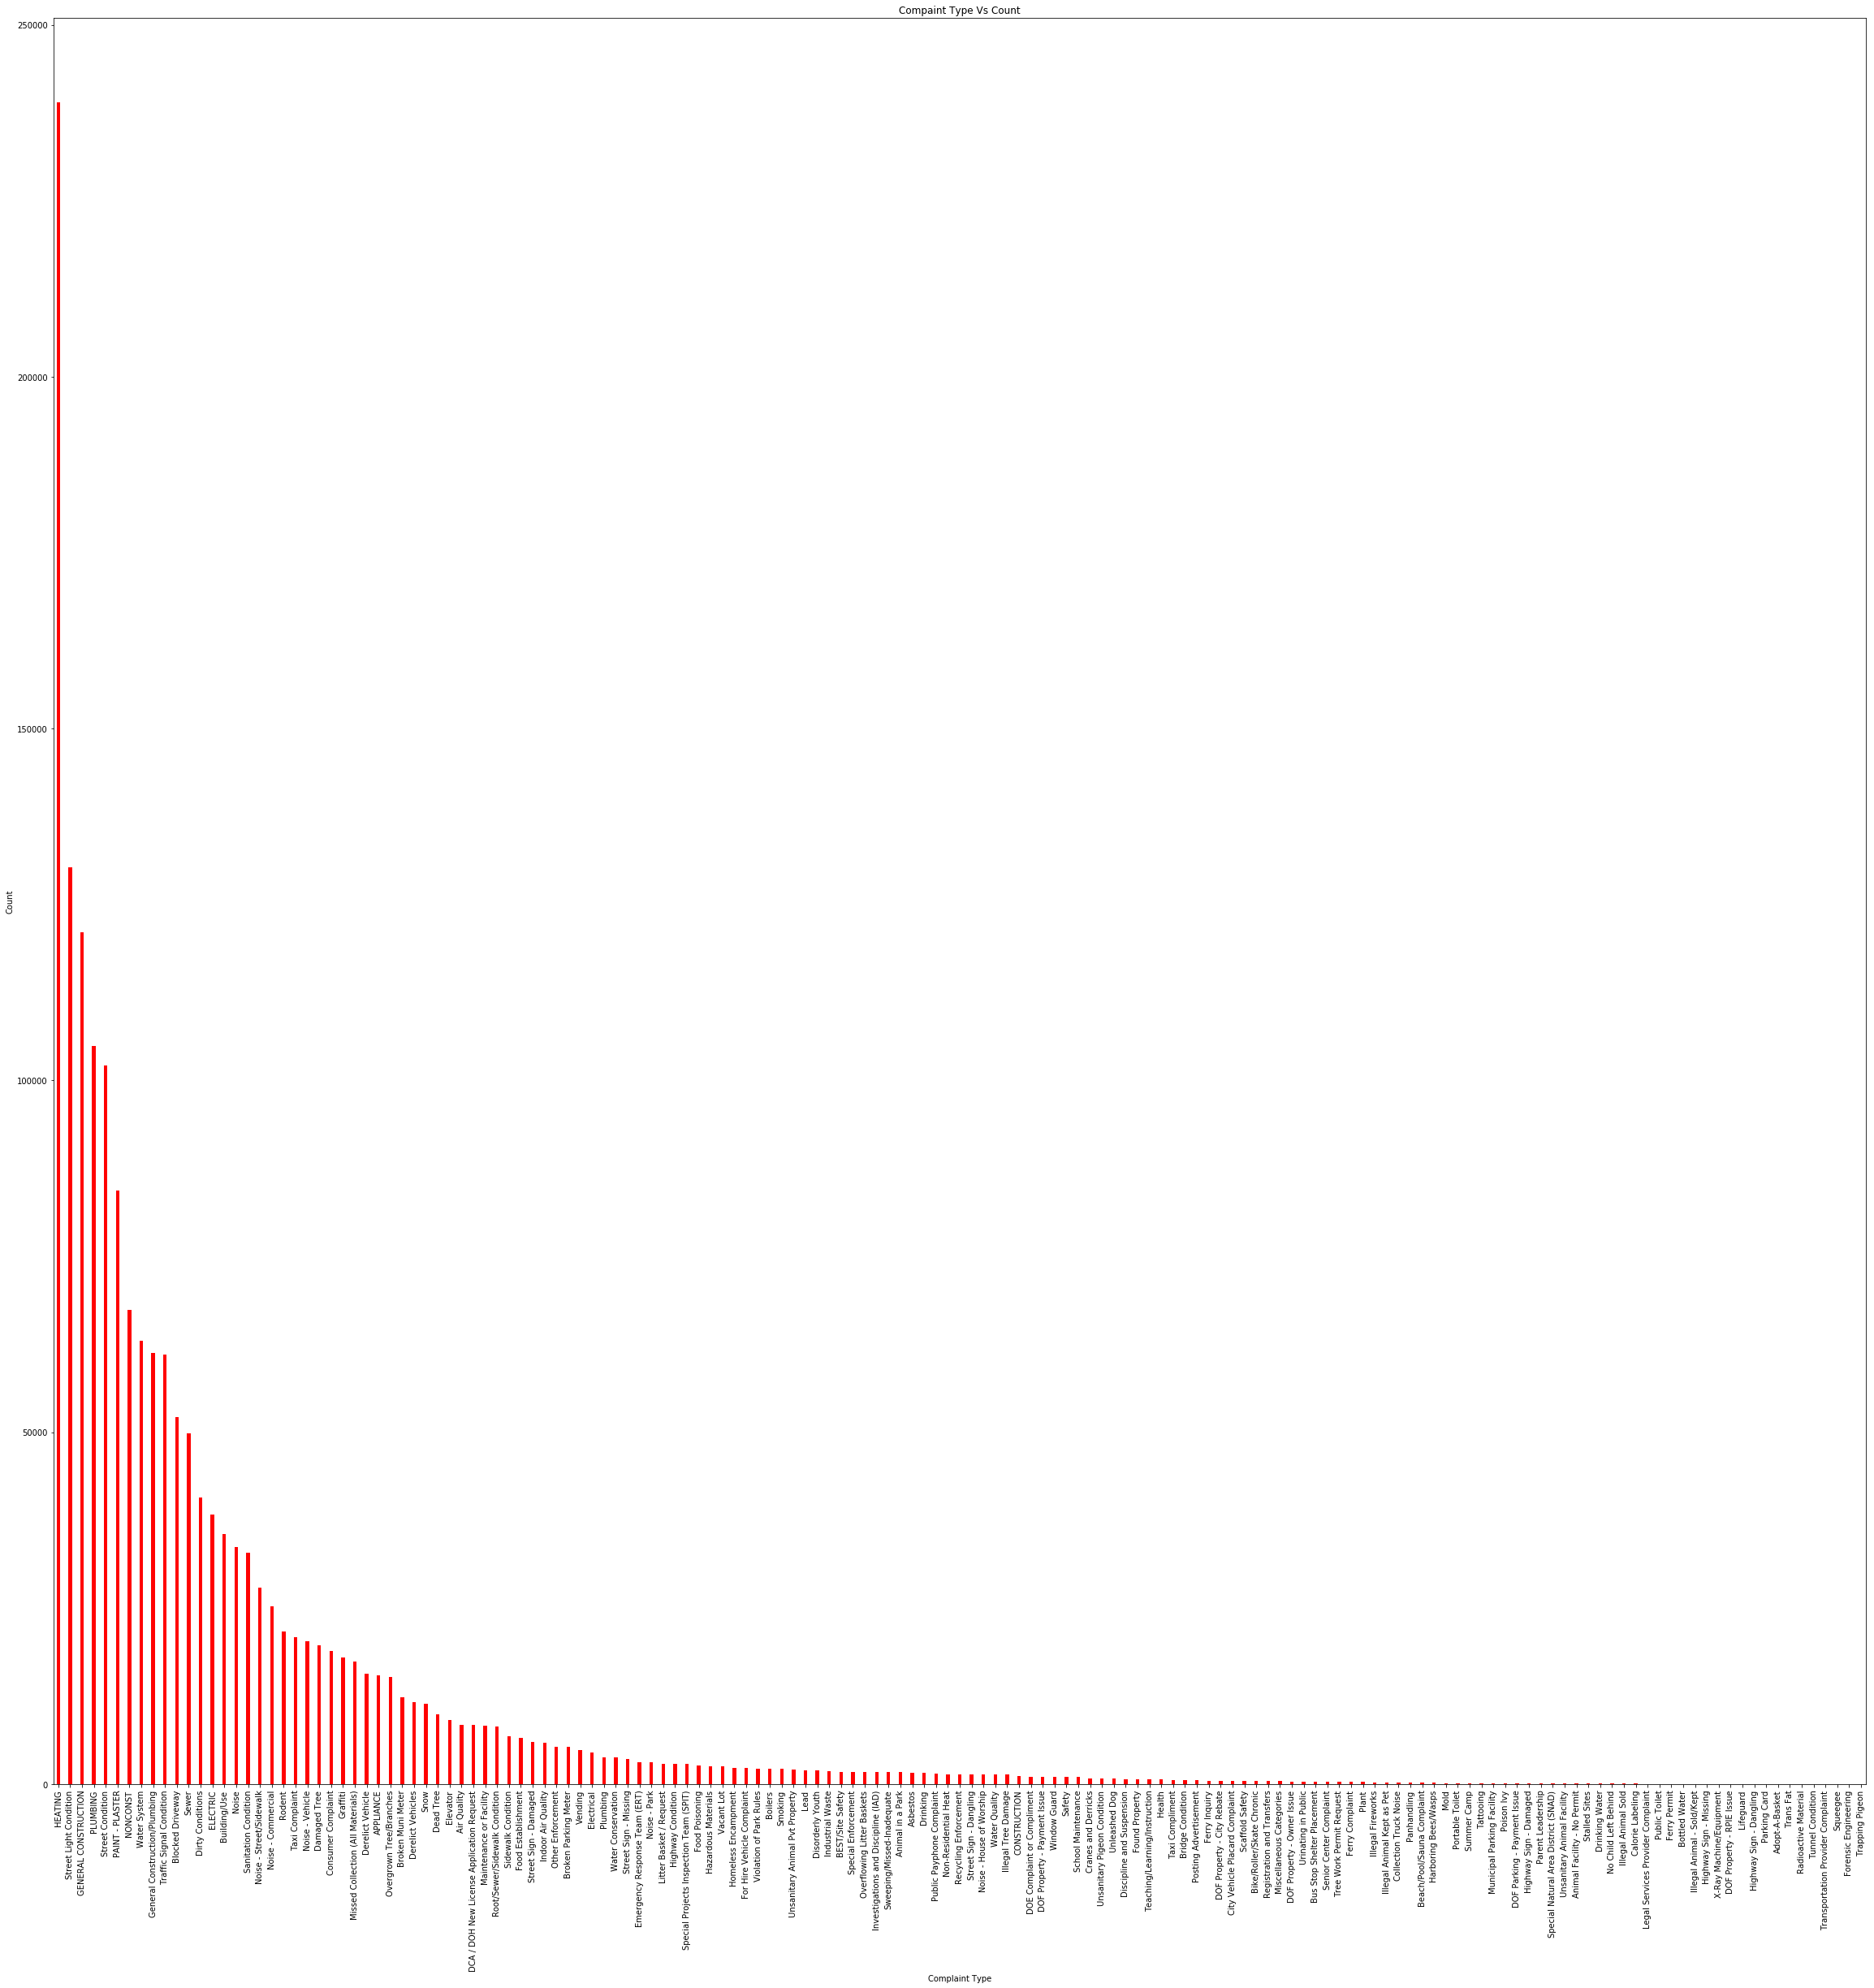

In [216]:
#Plotting Bar graph Between complaint type vs Count

complaint_type = major_complaints.size().sort_values(ascending=False)
plt.figure(figsize=(40,40))
complaint_type.plot(kind='bar',width=0.3,color='r')
plt.title('Compaint Type Vs Count')
plt.xlabel('Complaint Type')
plt.ylabel('Count')

plt.show()

([<matplotlib.patches.Wedge at 0x17593851c18>,
 [Text(0.822668,0.730217,'HEATING'),
  Text(-0.300472,1.05817,'Street Light Condition'),
  Text(-0.948618,0.556888,'GENERAL CONSTRUCTION'),
  Text(-1.08672,-0.17042,'PLUMBING'),
  Text(-0.778477,-0.777157,'Street Condition'),
  Text(-0.239883,-1.07352,'PAINT - PLASTER'),
  Text(0.262309,-1.06827,'NONCONST'),
  Text(0.65392,-0.884527,'Water System'),
  Text(0.933906,-0.581223,'General Construction/Plumbing'),
  Text(1.08118,-0.202632,'Traffic Signal Condition')])

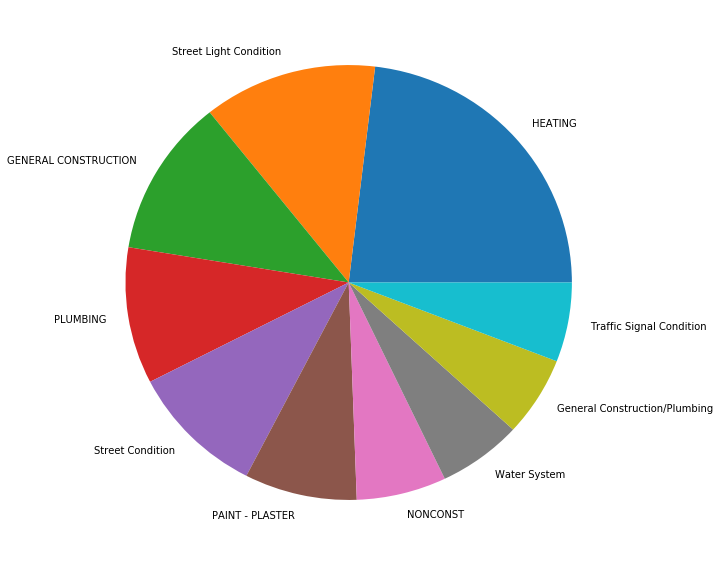

In [217]:
# pie plot for top 10 complaints type
sorted_major_complaints_top10 = sorted_major_complaints.head(10)

plt.figure(figsize=(10,10))
plt.pie(sorted_major_complaints_top10['count'],labels=sorted_major_complaints_top10['Complaint Type'])

In [218]:
 df['City'].isnull().sum() # Null check

121815

In [219]:
print('Before droping null City records Shape of df: ',df.shape)
df['City'] = df['City'].dropna() # Drop null records

Before droping null City records Shape of df:  (1783133, 52)


In [220]:
print('After droping null City records Shape of df: ',df.shape)

After droping null City records Shape of df:  (1783133, 52)


In [221]:
major_complaints.get_group('HEATING')['City'].isnull().sum()

382

In [222]:
major_complaints_heating = major_complaints.get_group('HEATING') # Get group heating

In [223]:
major_complaints_heating['City'].isnull().sum() # null check

382

In [224]:
major_complaints_heating['City'] = major_complaints_heating['City'].fillna('Unknown City')

C:\Users\Rohit\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [225]:
major_complaints_heating['City'].isnull().sum()

0

In [226]:
major_complaints_heating.City.unique()  # Unique cities

array(['BROOKLYN', 'OZONE PARK', 'WOODSIDE', 'NEW YORK', 'BRONX',
       'STATEN ISLAND', 'ASTORIA', 'ELMHURST', 'SUNNYSIDE', 'ARVERNE',
       'MASPETH', 'JAMAICA', 'HOLLIS', 'QUEENS VILLAGE', 'FLUSHING',
       'COLLEGE POINT', 'LONG ISLAND CITY', 'RIDGEWOOD', 'RICHMOND HILL',
       'SOUTH RICHMOND HILL', 'CORONA', 'BAYSIDE', 'FOREST HILLS',
       'JACKSON HEIGHTS', 'HOWARD BEACH', 'ROSEDALE', 'KEW GARDENS',
       'FAR ROCKAWAY', 'Unknown City', 'GLEN OAKS', 'FRESH MEADOWS',
       'WOODHAVEN', 'LITTLE NECK', 'SOUTH OZONE PARK', 'WHITESTONE',
       'OAKLAND GARDENS', 'EAST ELMHURST', 'REGO PARK', 'SAINT ALBANS',
       'SPRINGFIELD GARDENS', 'ROCKAWAY PARK', 'MIDDLE VILLAGE',
       'CAMBRIA HEIGHTS', 'BELLEROSE', 'NEW HYDE PARK', 'BREEZY POINT',
       'FLORAL PARK'], dtype=object)

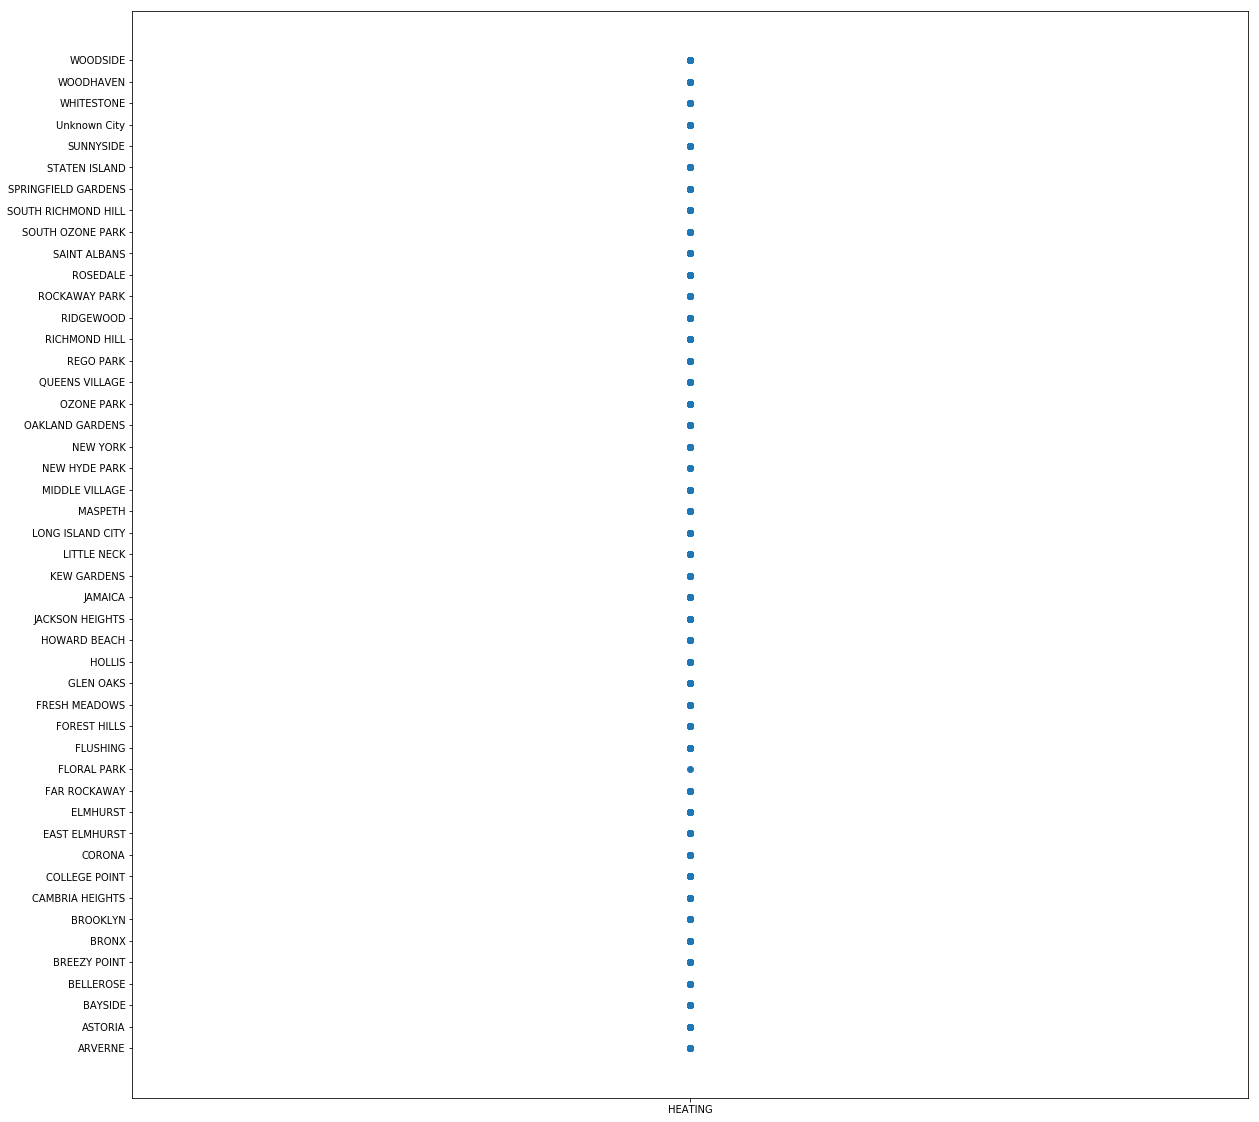

In [227]:
#scatter plot between complaint type heating vs City
plt.figure(figsize=(20,20))
plt.scatter(major_complaints_heating['Complaint Type'], major_complaints_heating['City'])
plt.show()

In [228]:
df_complainttype_city_heating = df_complainttype_city[df_complainttype_city['Complaint Type'] == 'HEATING'][['City','count']].sort_values('count',ascending=False)

In [229]:
df_complainttype_city_heating.head(10)

,City,count
2284,BROOKLYN,79838
2283,BRONX,76587
2306,NEW YORK,48375
2299,JAMAICA,4275
2319,STATEN ISLAND,2821
2279,ASTORIA,2649
2292,FLUSHING,2545
2312,RIDGEWOOD,1811
2290,FAR ROCKAWAY,1694
2323,WOODSIDE,1584


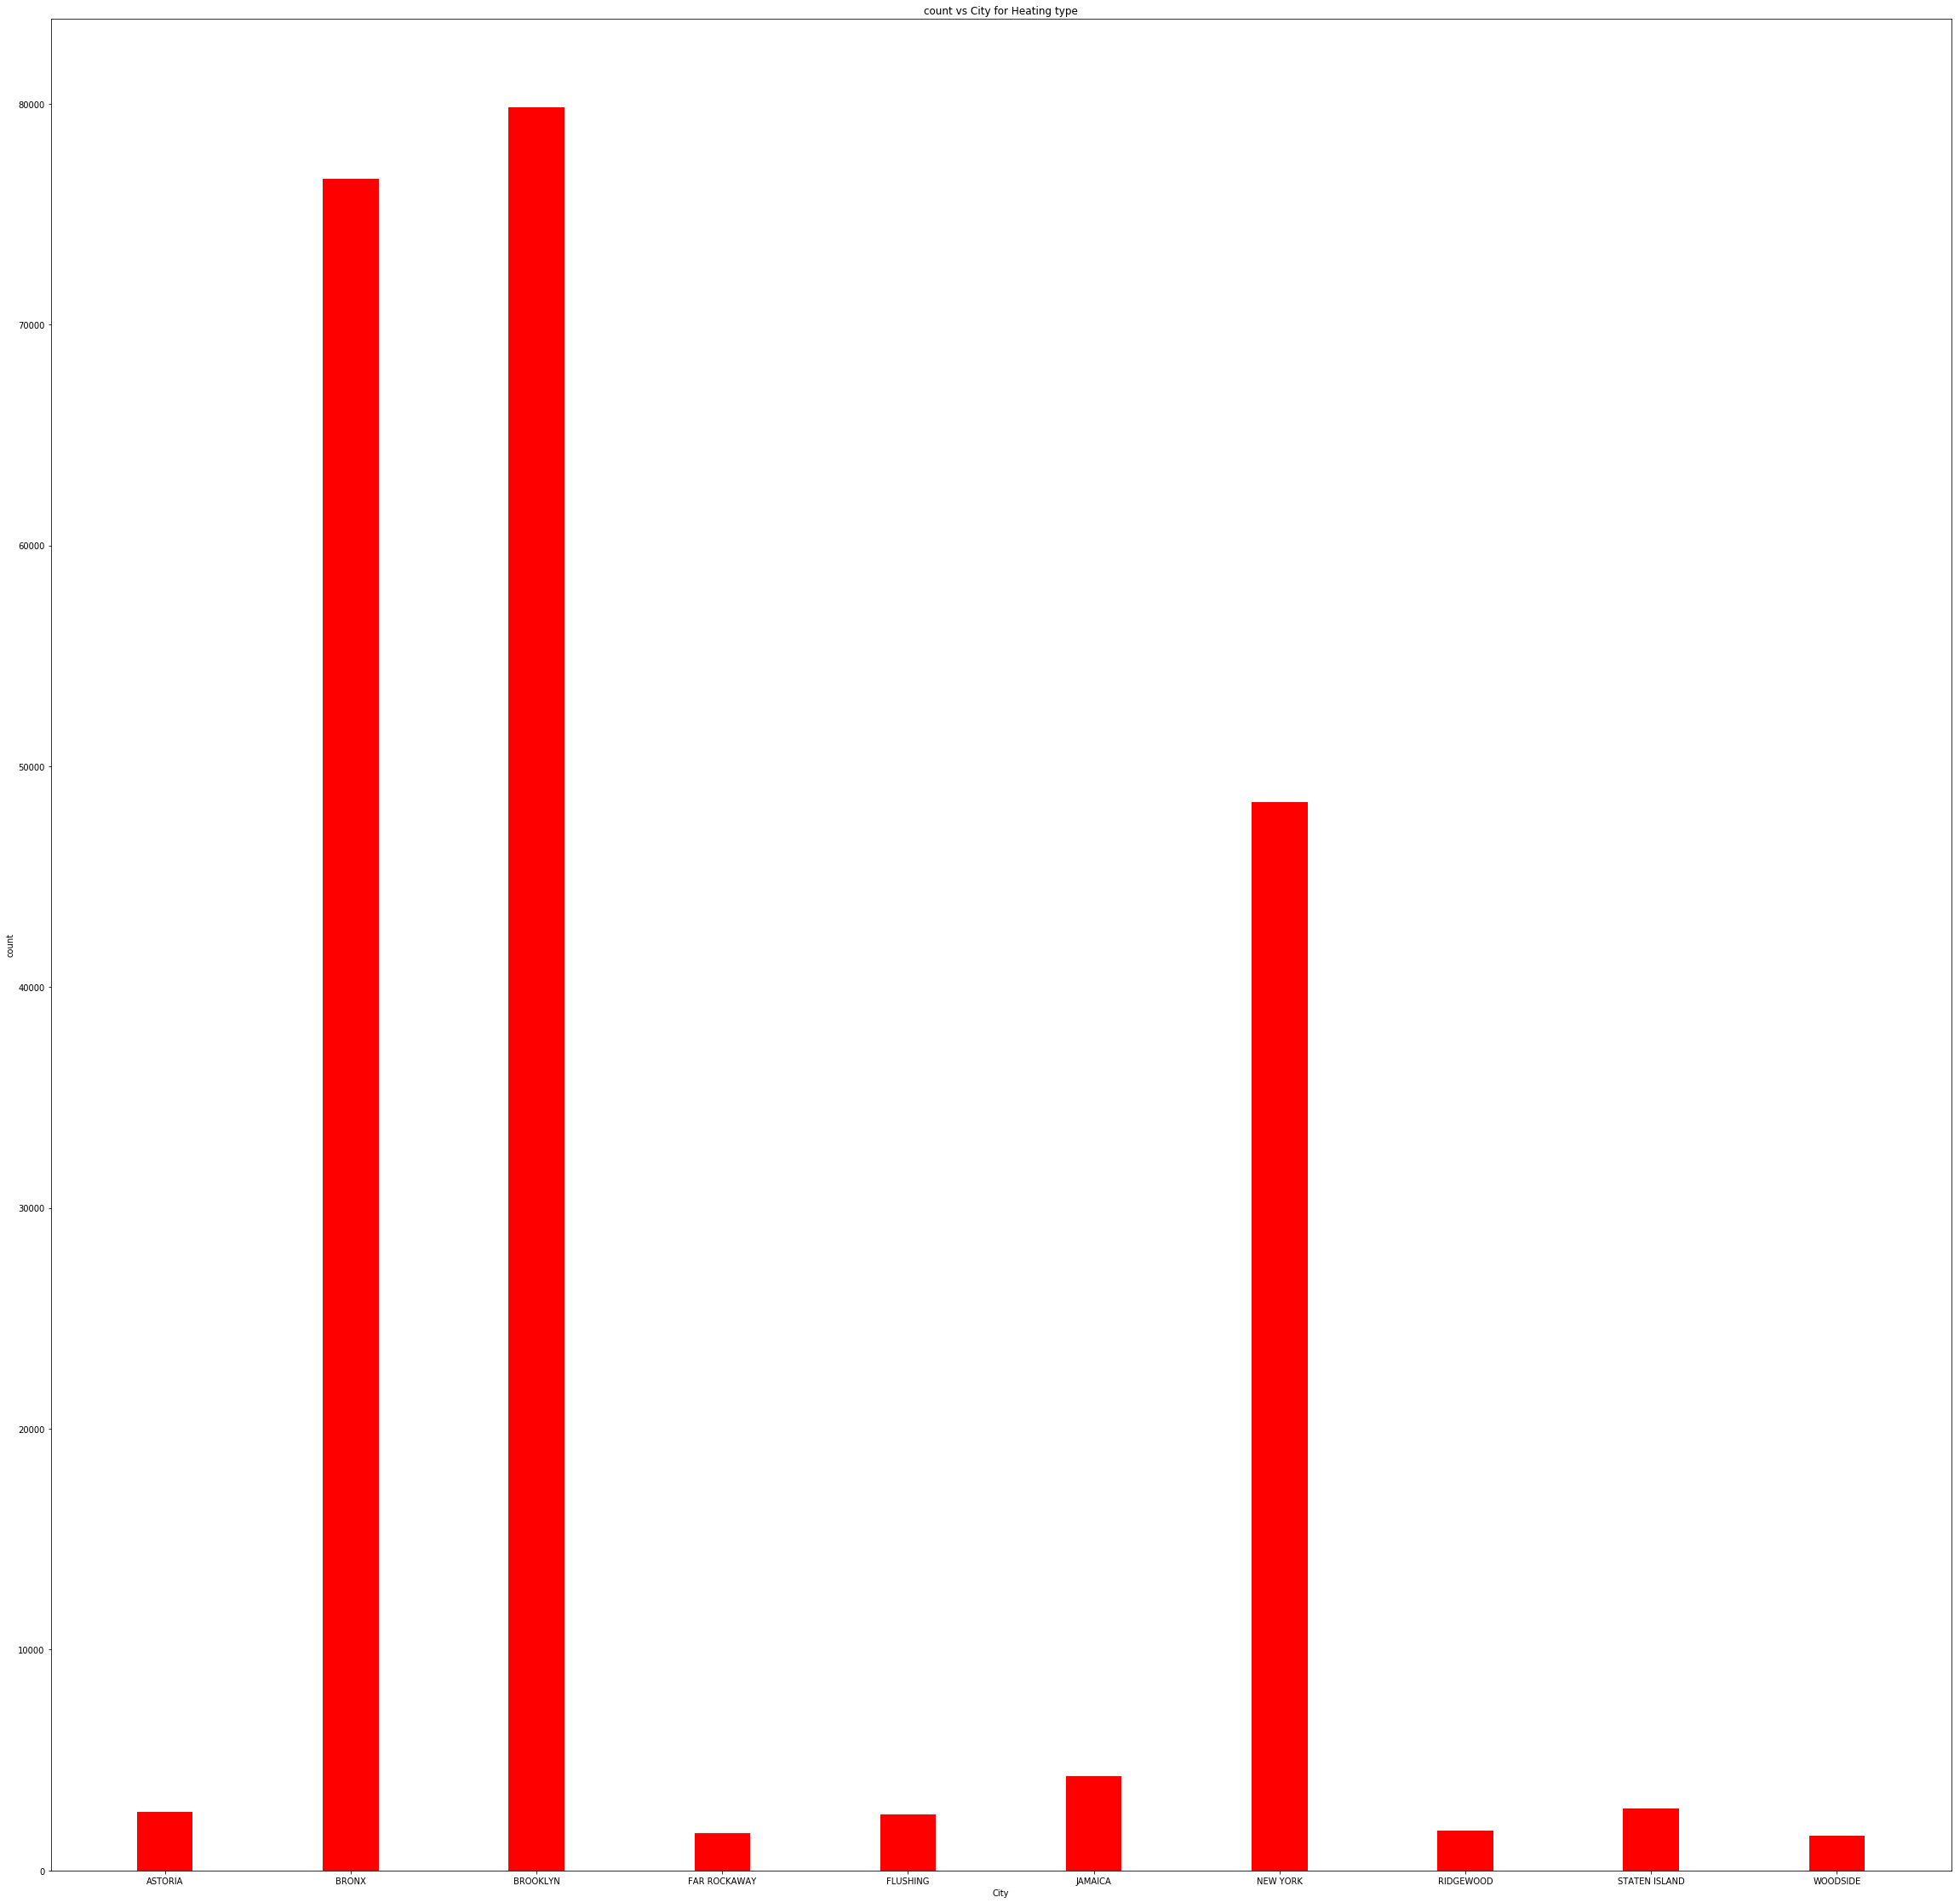

In [230]:
# bar chart between heating complaint type count vs city for top 10 cities
plt.figure(figsize=(40,40))

plt.bar(df_complainttype_city_heating.head(10)['City'],df_complainttype_city_heating.head(10)['count'],width=0.3,color='r')
plt.xlabel('City')
plt.ylabel('count')
plt.title('count vs City for Heating type')
plt.show()

In [231]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [232]:
df['Status'].value_counts()

Closed         1675026
Pending          73717
Assigned         17611
Open             14886
Draft             1789
Started            100
Unspecified          4
Name: Status, dtype: int64

In [233]:
df['Status'].isnull().sum()

0

<function matplotlib.pyplot.show>

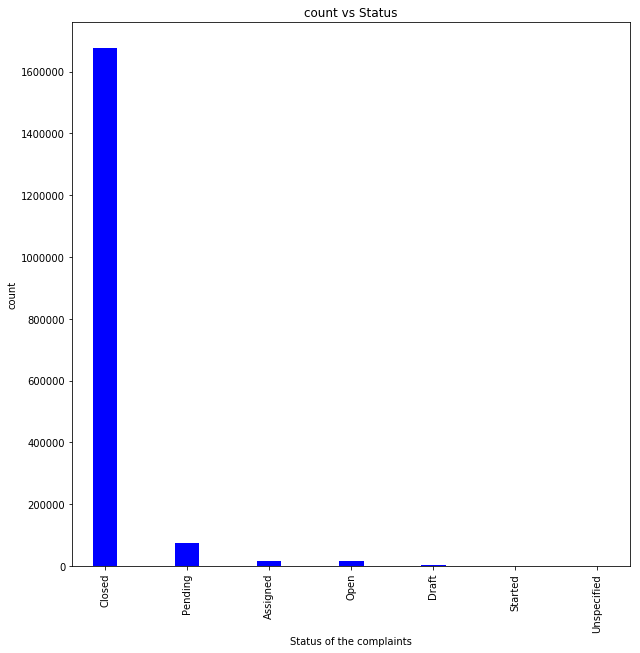

In [234]:
# bar chart between count and status of the complaint

plt.figure(figsize=(10,10))

df['Status'].value_counts().plot(kind='bar',color='b',width=0.3)
plt.ylabel('count')
plt.xlabel('Status of the complaints')
plt.title('count vs Status')
plt.show